In [39]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)

In [40]:
def plot_people_metrics(metrics, from_ts, to_ts):
    metrics.set_index = metrics["ts"]
    metrics = metrics[from_ts:to_ts]

    fig,axs = plt.subplots(2,2,figsize=(12,8))
    
    # Number of Pods
    axs[0][0].plot(metrics["ts"].values, metrics["number_of_pods"].values, )
    # axs[0][0].set_title("Number of Pods")
    axs[0][0].set_xlabel("Time in Seconds")
    axs[0][0].set_ylabel("Average Number of Pods")
    axs[0][0].grid()

    # Time
    axs[0][1].stackplot(metrics["ts"].values, metrics[["time_in_station", "time_in_pods"]].T, labels=["Time in Station", "Time in Pods"])
    axs[0][1].legend(loc="upper left")
    # axs[0][1].set_title("Time in Stations vs Pods")
    axs[0][1].set_xlabel("Time in Seconds")
    axs[0][1].set_ylabel("Combined Average Time Spent")
    axs[0][1].grid()

    # Number of Pods
    axs[1][0].plot(metrics["ts"].values, metrics["meters_traveled"].values, )
    # axs[1][0].set_title("Meters Traveled")
    axs[1][0].set_xlabel("Time in Seconds")
    axs[1][0].set_ylabel("Average Meters Traveled")
    axs[1][0].grid()

# plt.show()

In [41]:
def plot_pods_metrics(metrics, from_ts, to_ts):
    metrics.set_index = metrics["ts"]
    metrics = metrics[from_ts:to_ts]

    fig,axs = plt.subplots(2,2,figsize=(12,8))

    # Utilization
    axs[0][0].plot(metrics["ts"].values, metrics["utilization"].values, )
    # axs[0][0].set_title("Number of Pods")
    axs[0][0].set_xlabel("Time in Seconds")
    axs[0][0].set_ylabel("Average Utilization of Pods")
    axs[0][0].grid()

    # Time
    axs[0][1].stackplot(metrics["ts"].values, metrics[["time_in_station", "time_in_queue", "time_driving"]].T, labels=["Time in Station", "Time in Queue", "Time Driving"])
    axs[0][1].legend(loc="upper left")
    # axs[0][1].set_title("Time in Stations vs Pods")
    axs[0][1].set_xlabel("Time in Seconds")
    axs[0][1].set_ylabel("Combined Average Time Spent")
    axs[0][1].grid()

    # Meters Traveled
    axs[1][0].plot(metrics["ts"].values, metrics["meters_traveled"].values, )
    # axs[1][0].set_title("Meters Traveled")
    axs[1][0].set_xlabel("Time in Seconds")
    axs[1][0].set_ylabel("Average Meters Traveled")
    axs[1][0].grid()

# Analysis over different runs

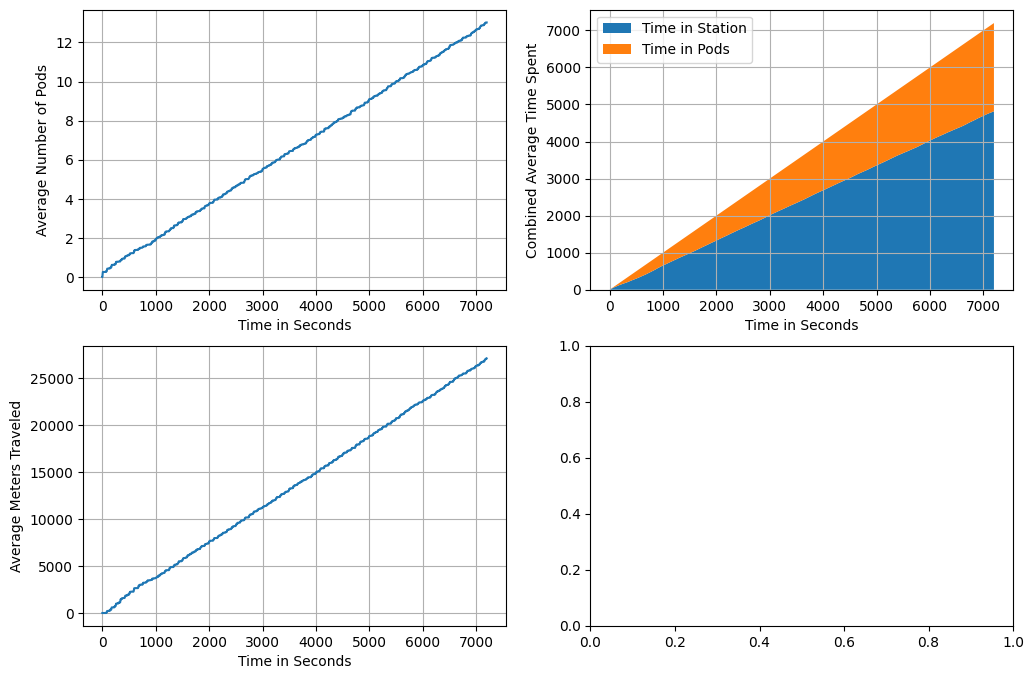

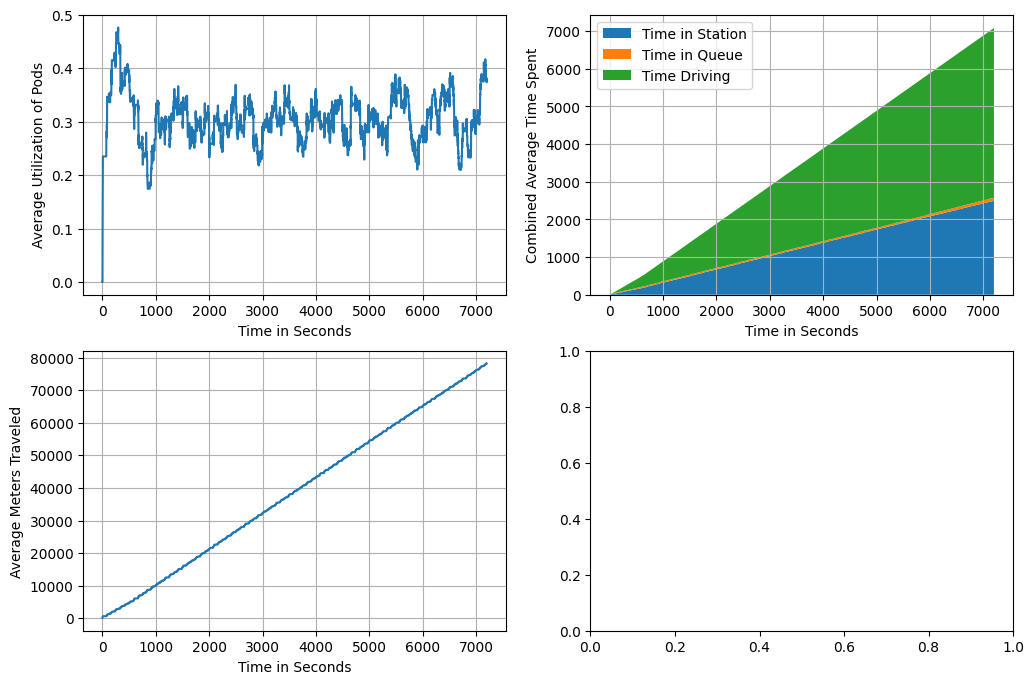

In [35]:
people_avg_metrics = pd.read_csv("/home/david/Code/Uni/publicflow/metrics/dev/2022.09.22_20:02/people/avg.txt")
pods_avg_metrics = pd.read_csv("/home/david/Code/Uni/publicflow/metrics/dev/2022.09.22_20:02/pods/avg.txt")
plot_people_metrics(people_avg_metrics, 0,7200)
plot_pods_metrics(pods_avg_metrics, 0,7200)

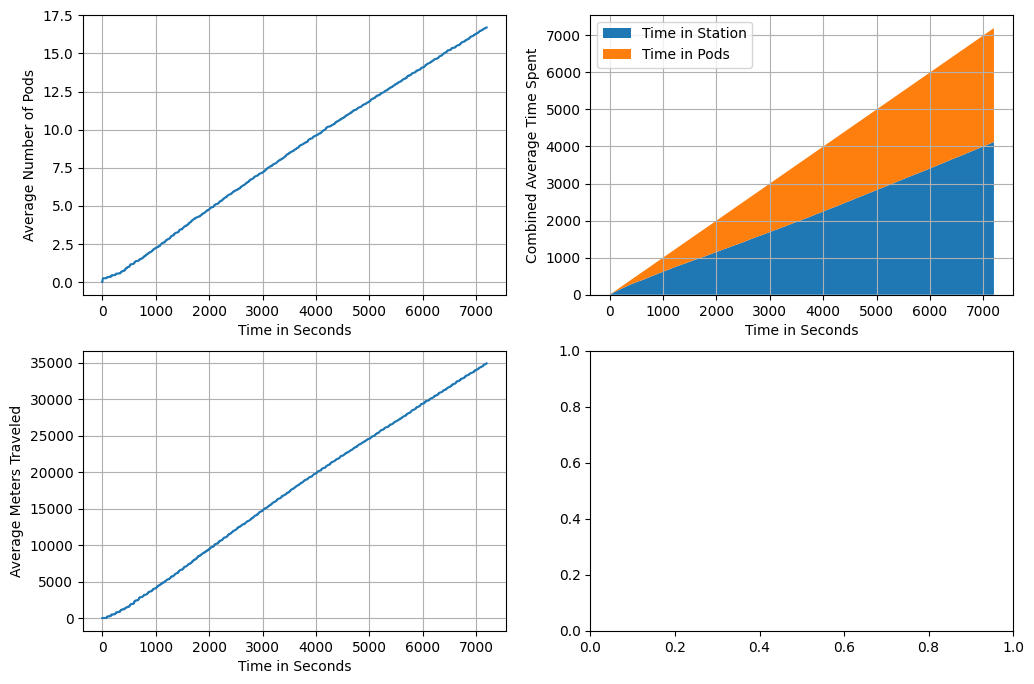

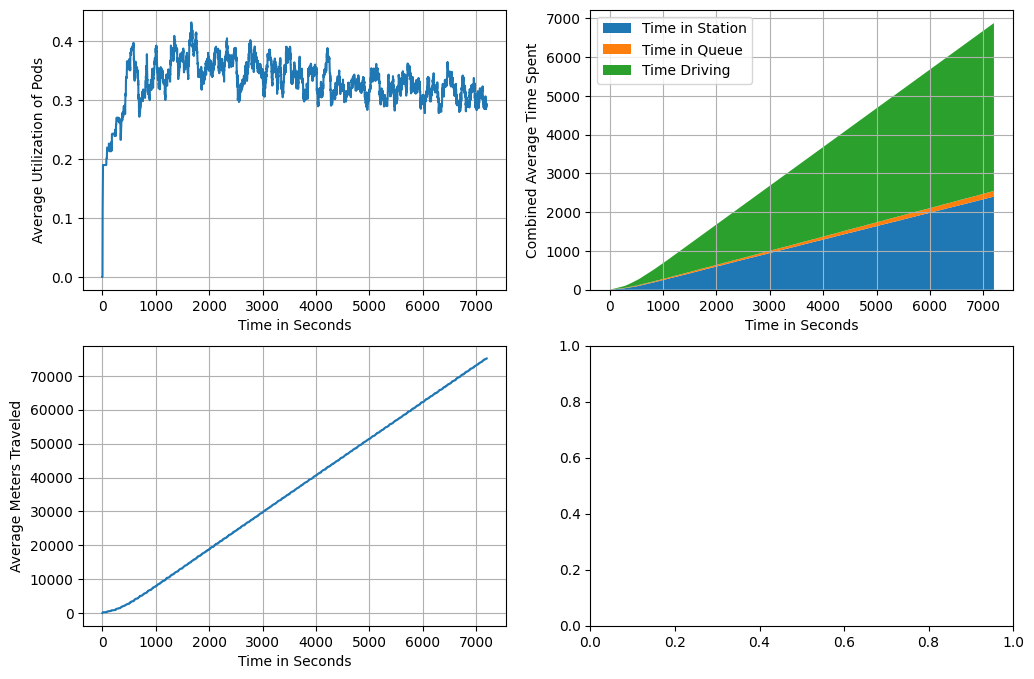

In [36]:
people_avg_metrics = pd.read_csv("/home/david/Code/Uni/publicflow/metrics/dev/2022.09.22_20:05/people/avg.txt")
pods_avg_metrics = pd.read_csv("/home/david/Code/Uni/publicflow/metrics/dev/2022.09.22_20:05/pods/avg.txt")
plot_people_metrics(people_avg_metrics, 0,7200)
plot_pods_metrics(pods_avg_metrics, 0,7200)

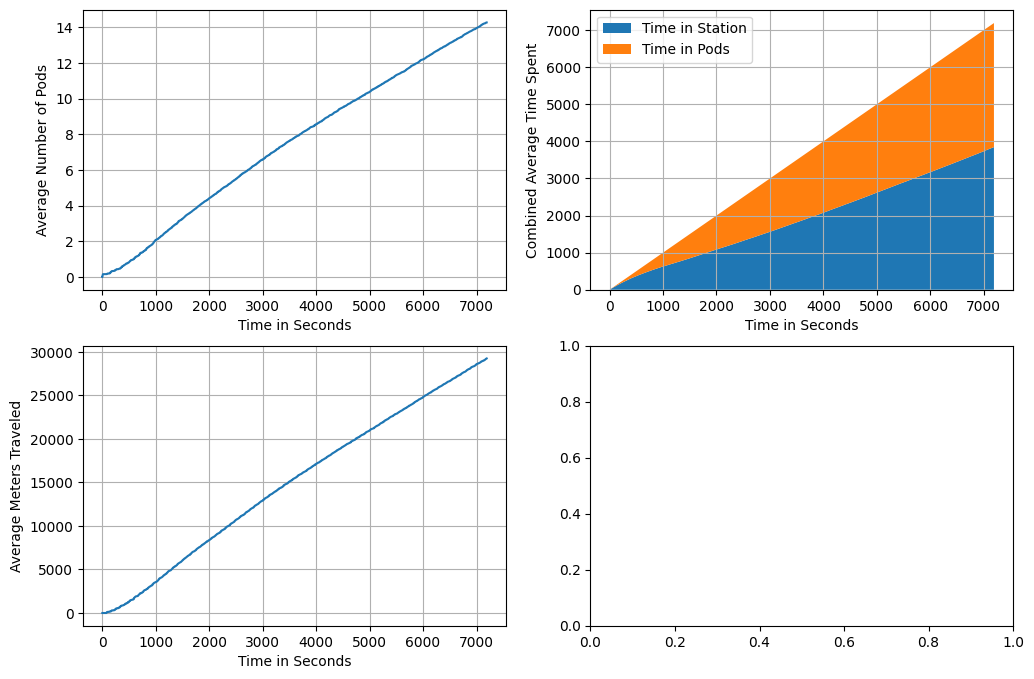

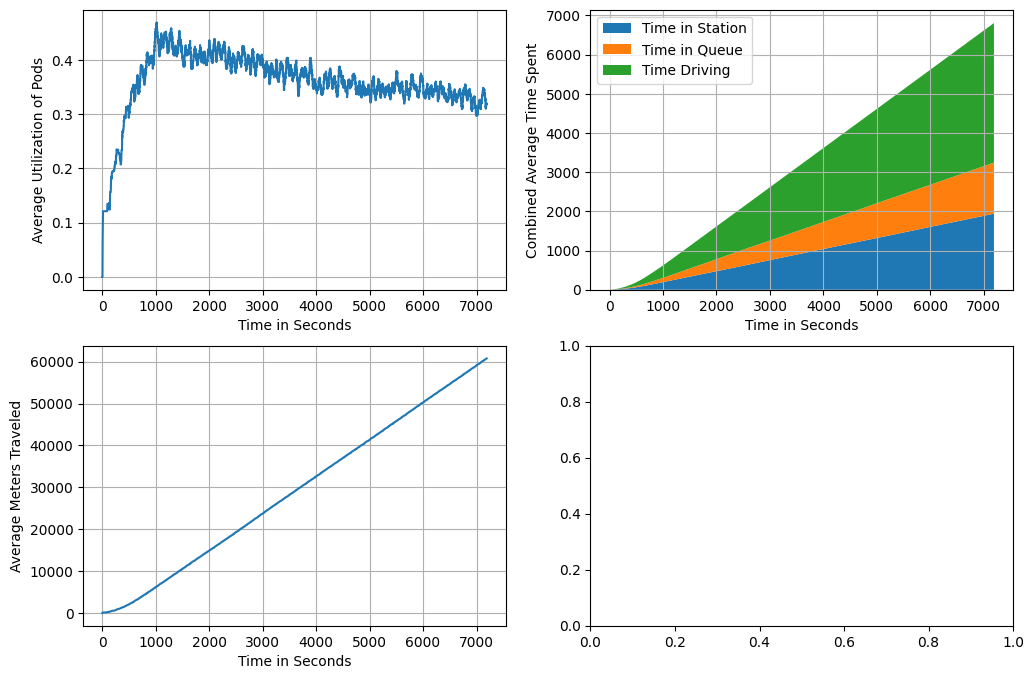

In [37]:
people_avg_metrics = pd.read_csv("/home/david/Code/Uni/publicflow/metrics/dev/2022.09.22_20:06/people/avg.txt")
pods_avg_metrics = pd.read_csv("/home/david/Code/Uni/publicflow/metrics/dev/2022.09.22_20:06/pods/avg.txt")
plot_people_metrics(people_avg_metrics, 0,7200)
plot_pods_metrics(pods_avg_metrics, 0,7200)

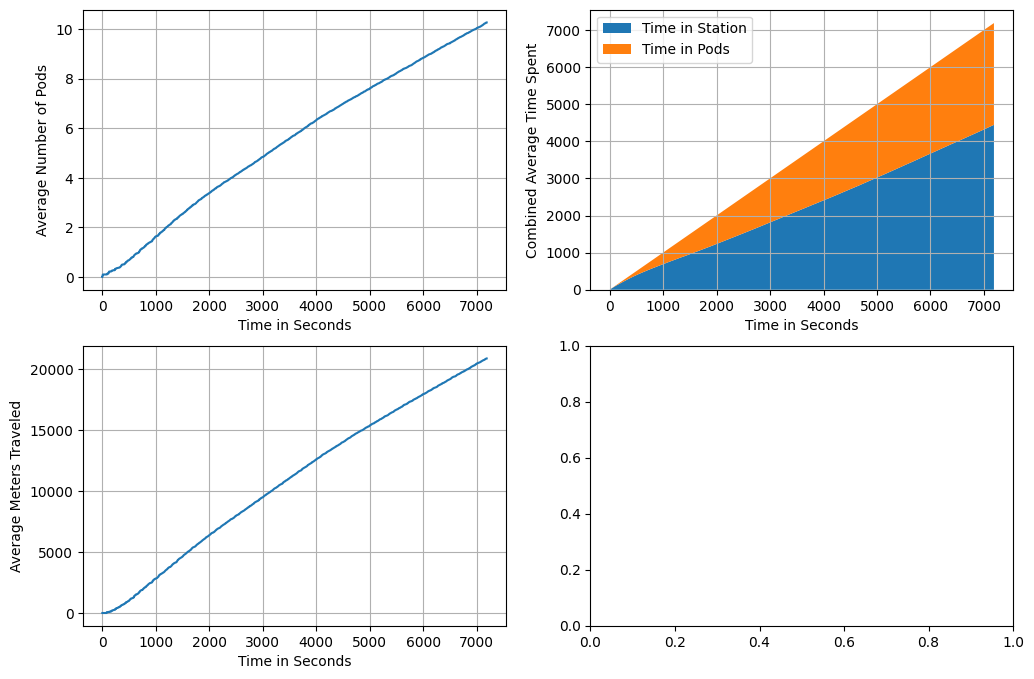

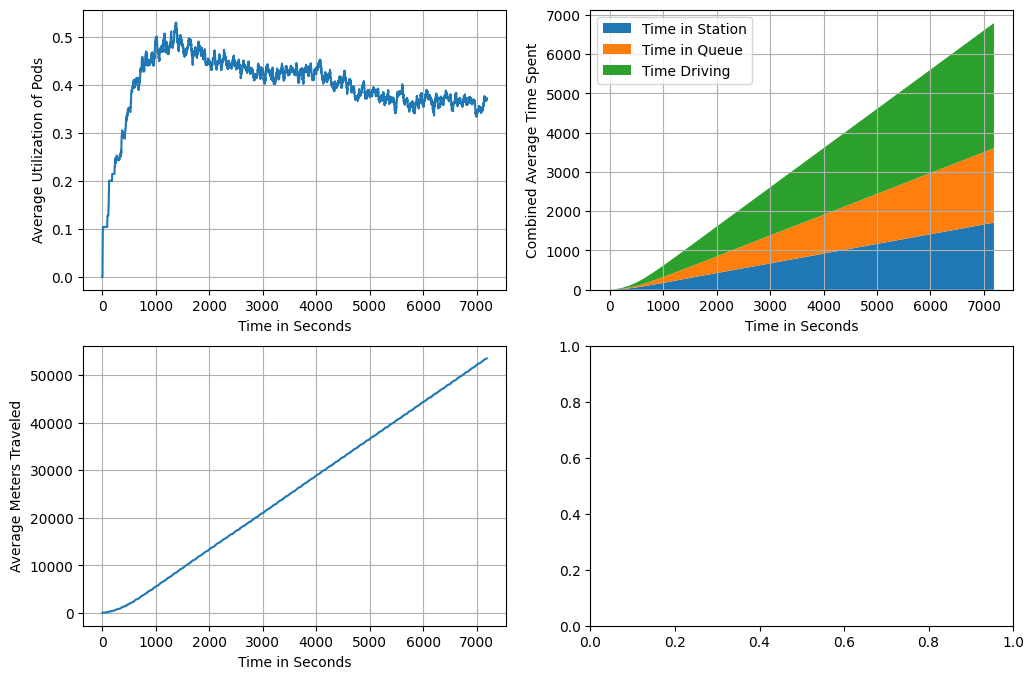

In [38]:
people_avg_metrics = pd.read_csv("/home/david/Code/Uni/publicflow/metrics/dev/2022.09.22_20:08/people/avg.txt")
pods_avg_metrics = pd.read_csv("/home/david/Code/Uni/publicflow/metrics/dev/2022.09.22_20:08/pods/avg.txt")
plot_people_metrics(people_avg_metrics, 0,7200)
plot_pods_metrics(pods_avg_metrics, 0,7200)

# Now the analysis of the runs where all people were directed to station 11

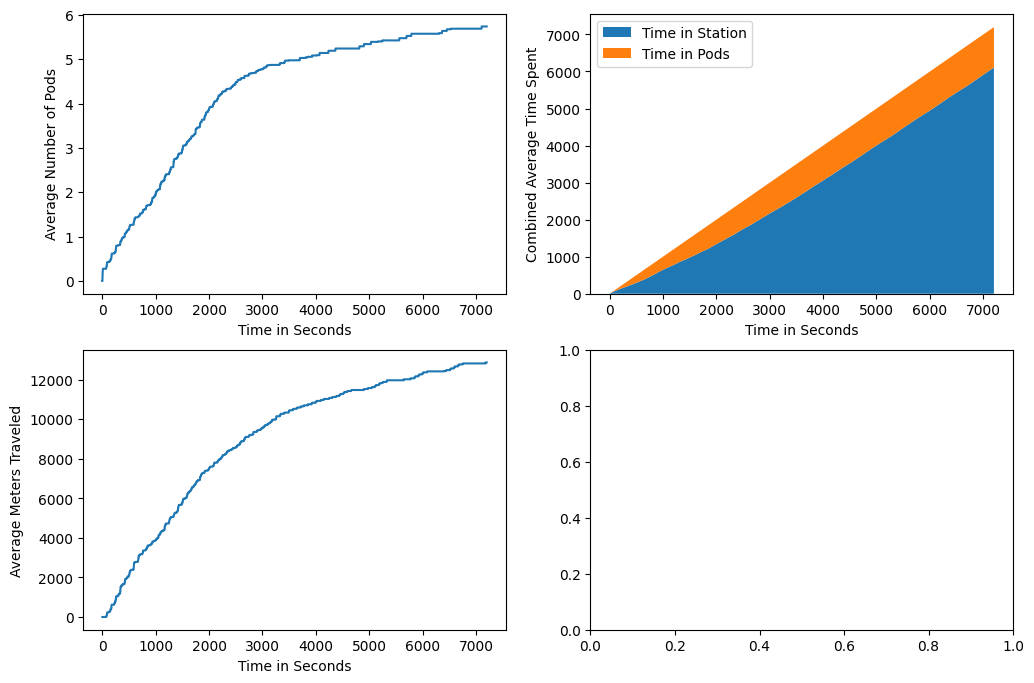

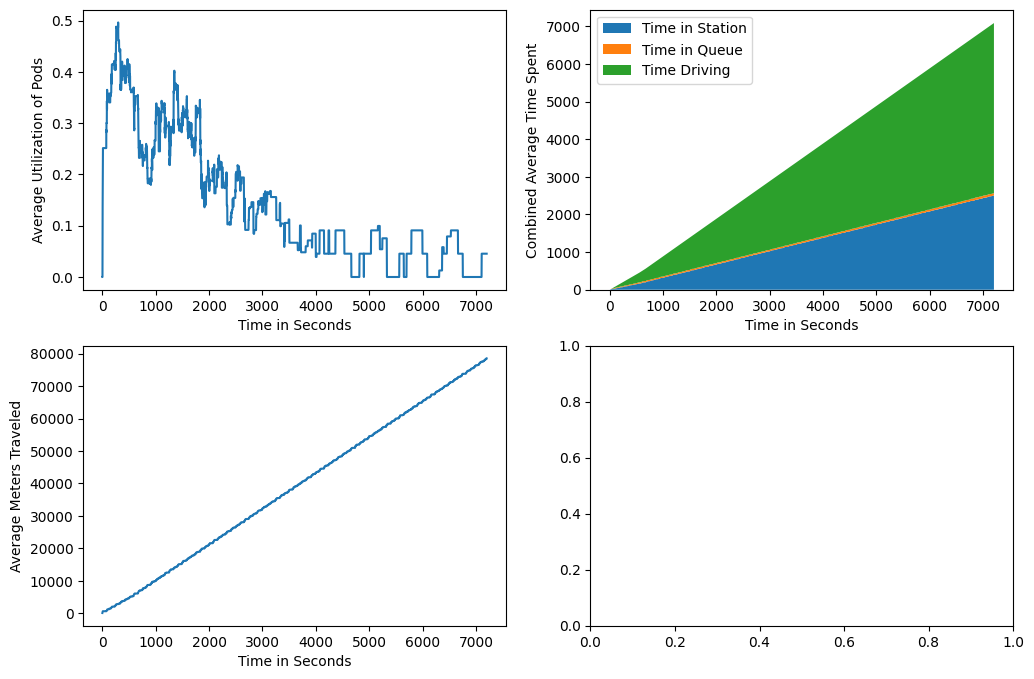

In [17]:
people_avg_metrics = pd.read_csv("/home/david/Code/Uni/publicflow/metrics/route/2022.09.22_20:15/people/avg.txt")
pods_avg_metrics = pd.read_csv("/home/david/Code/Uni/publicflow/metrics/route/2022.09.22_20:15/pods/avg.txt")
plot_people_metrics(people_avg_metrics, 0,7200)
plot_pods_metrics(pods_avg_metrics, 0,7200)

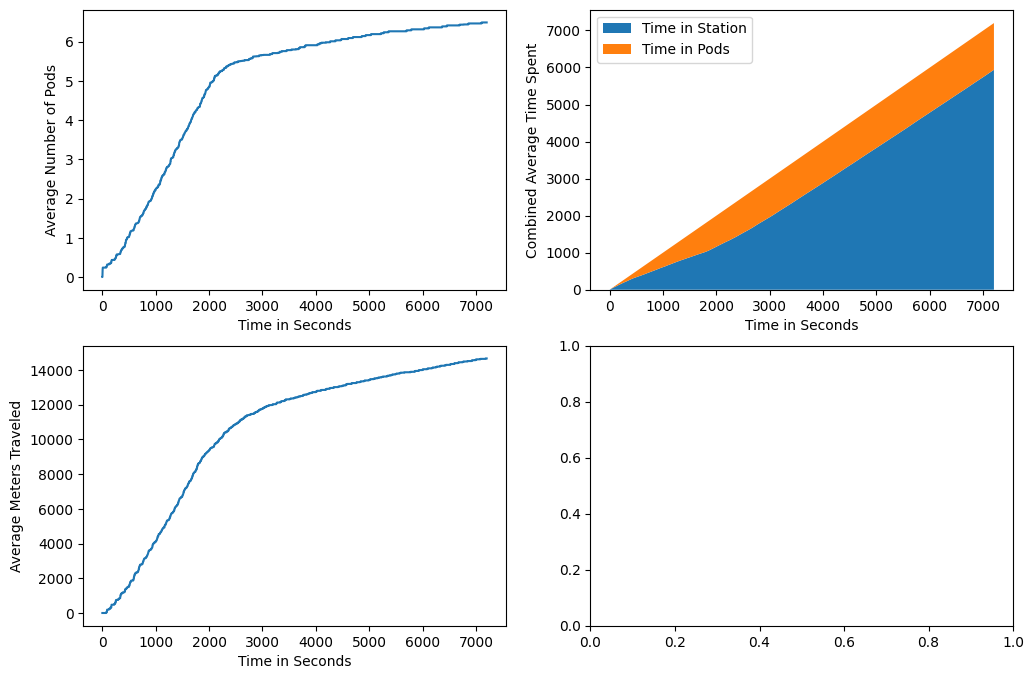

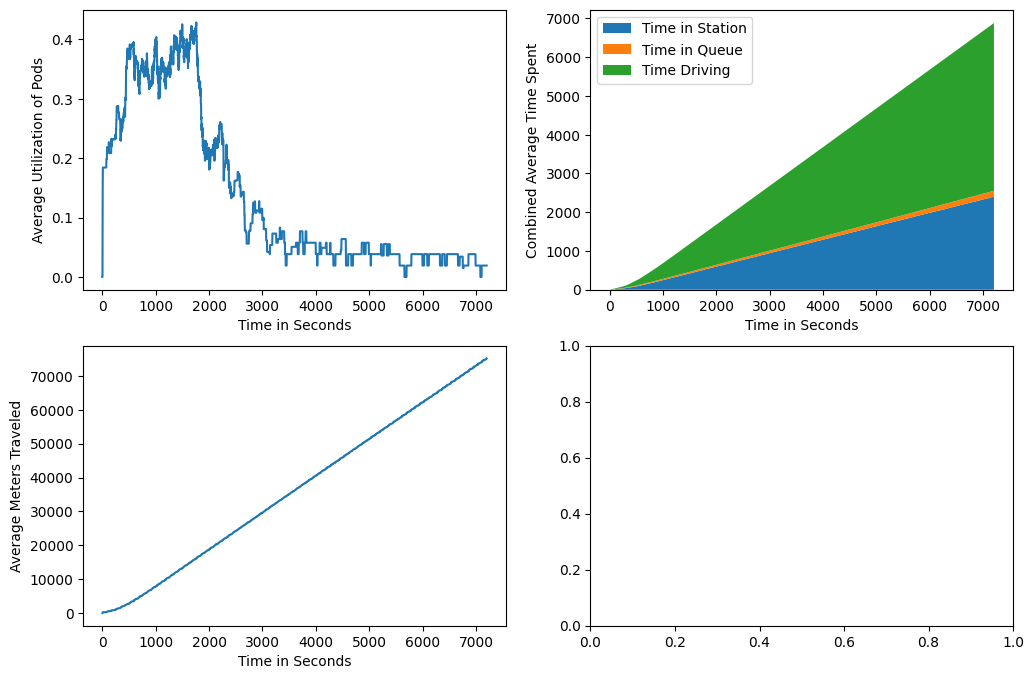

In [18]:
people_avg_metrics = pd.read_csv("/home/david/Code/Uni/publicflow/metrics/route/2022.09.22_20:18/people/avg.txt")
pods_avg_metrics = pd.read_csv("/home/david/Code/Uni/publicflow/metrics/route/2022.09.22_20:18/pods/avg.txt")
plot_people_metrics(people_avg_metrics, 0,7200)
plot_pods_metrics(pods_avg_metrics, 0,7200)

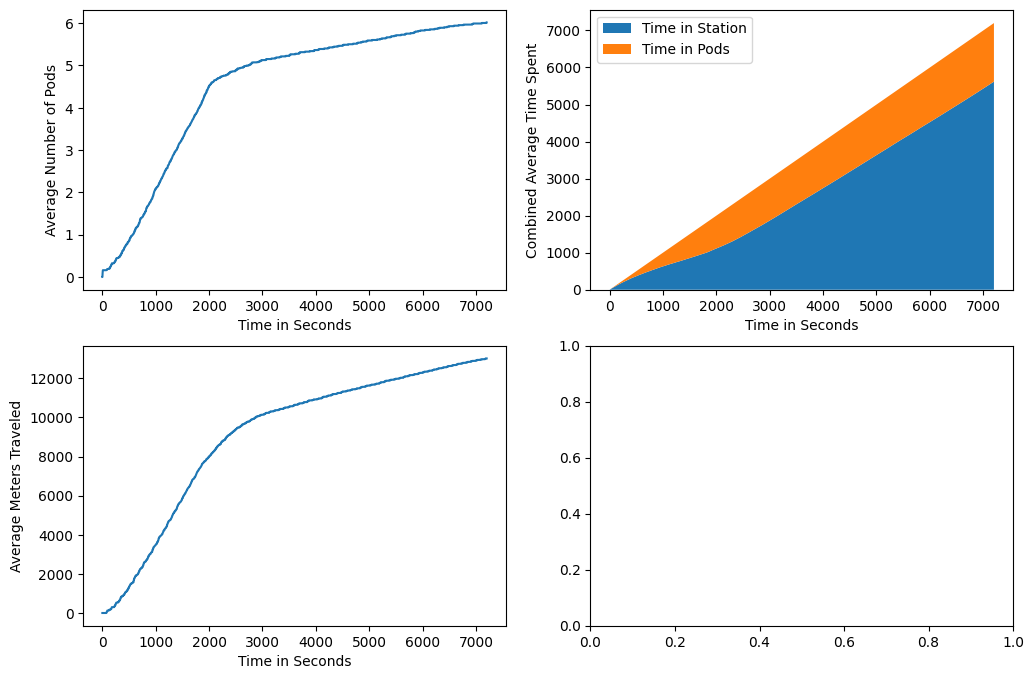

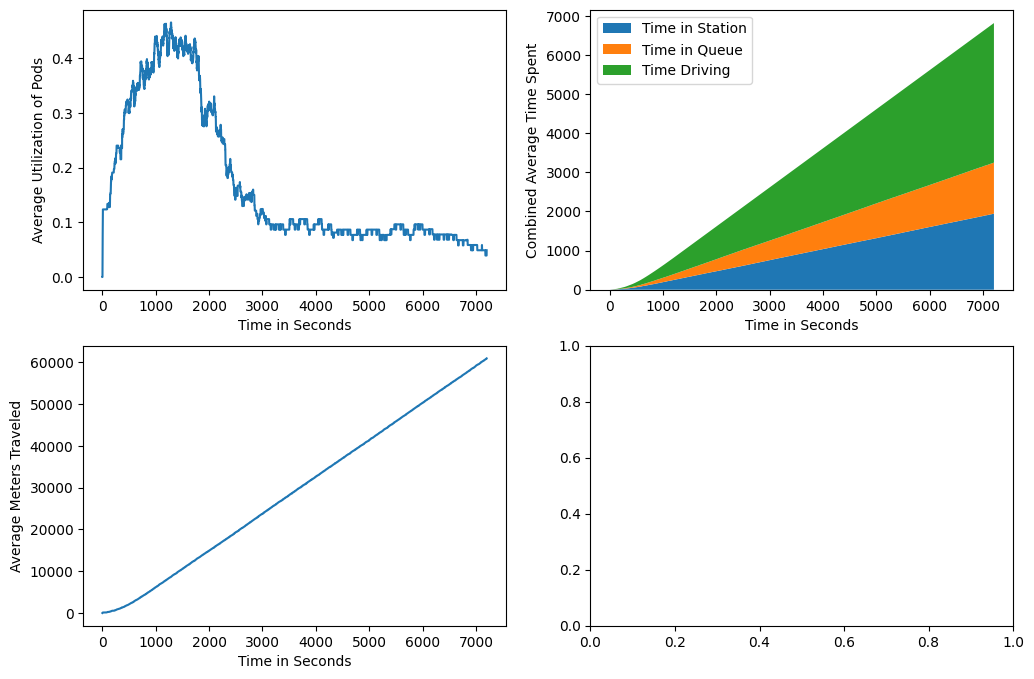

In [19]:
people_avg_metrics = pd.read_csv("/home/david/Code/Uni/publicflow/metrics/route/2022.09.22_20:20/people/avg.txt")
pods_avg_metrics = pd.read_csv("/home/david/Code/Uni/publicflow/metrics/route/2022.09.22_20:20/pods/avg.txt")
plot_people_metrics(people_avg_metrics, 0,7200)
plot_pods_metrics(pods_avg_metrics, 0,7200)

# Dev run bus back home

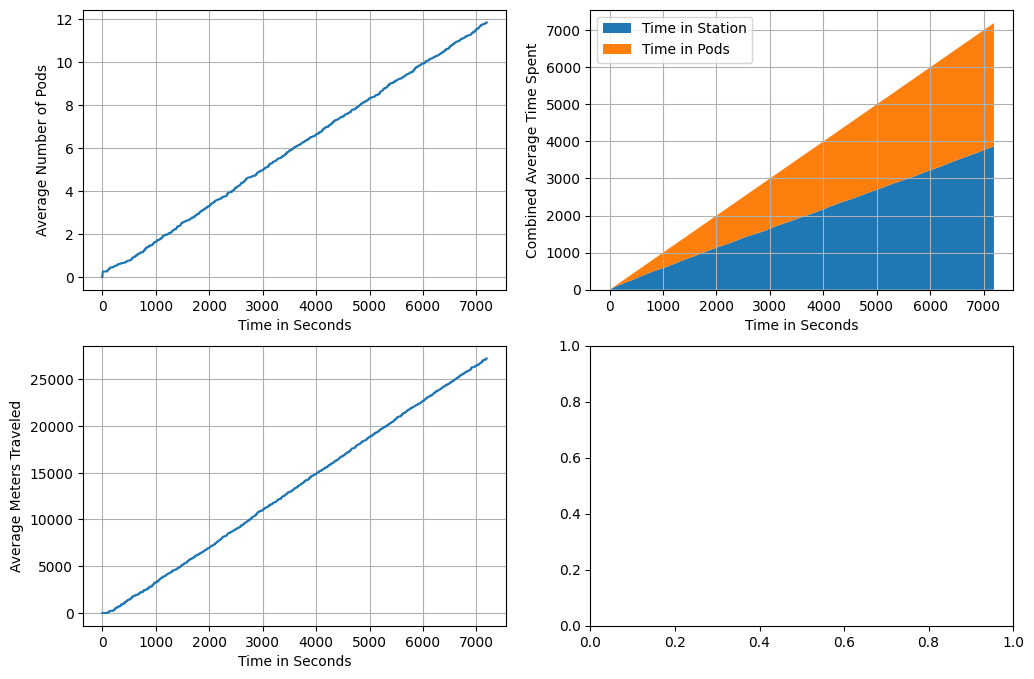

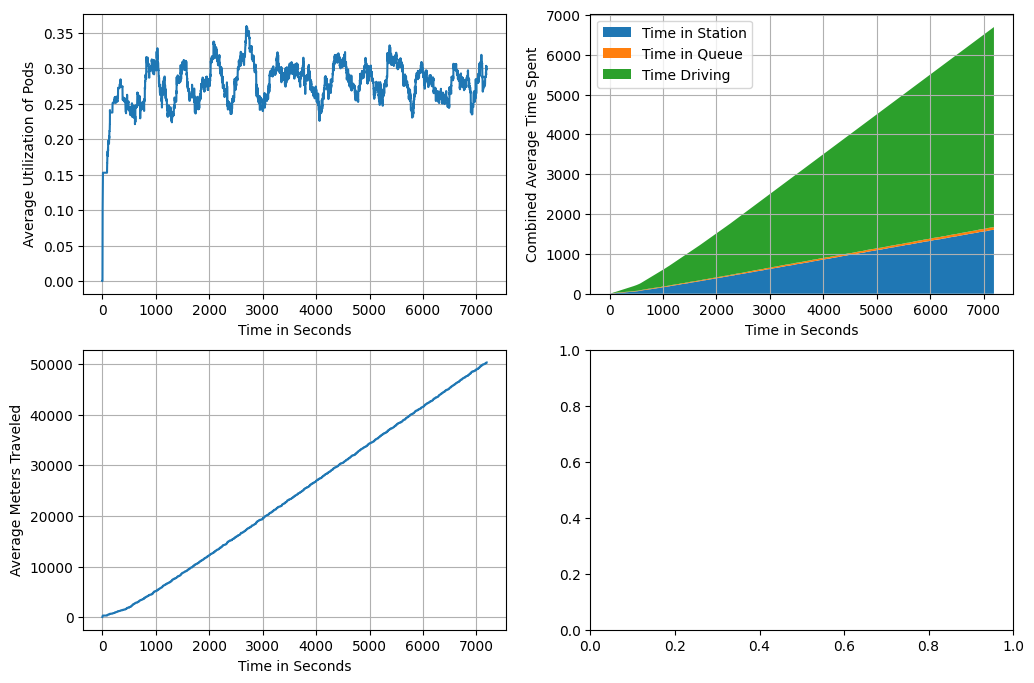

In [43]:
people_avg_metrics = pd.read_csv("/home/david/Code/Uni/publicflow/metrics/dev/2022.09.23_13:06/people/avg.txt")
pods_avg_metrics = pd.read_csv("/home/david/Code/Uni/publicflow/metrics/dev/2022.09.23_13:06/pods/avg.txt")
plot_people_metrics(people_avg_metrics, 0,7200)
plot_pods_metrics(pods_avg_metrics, 0,7200)

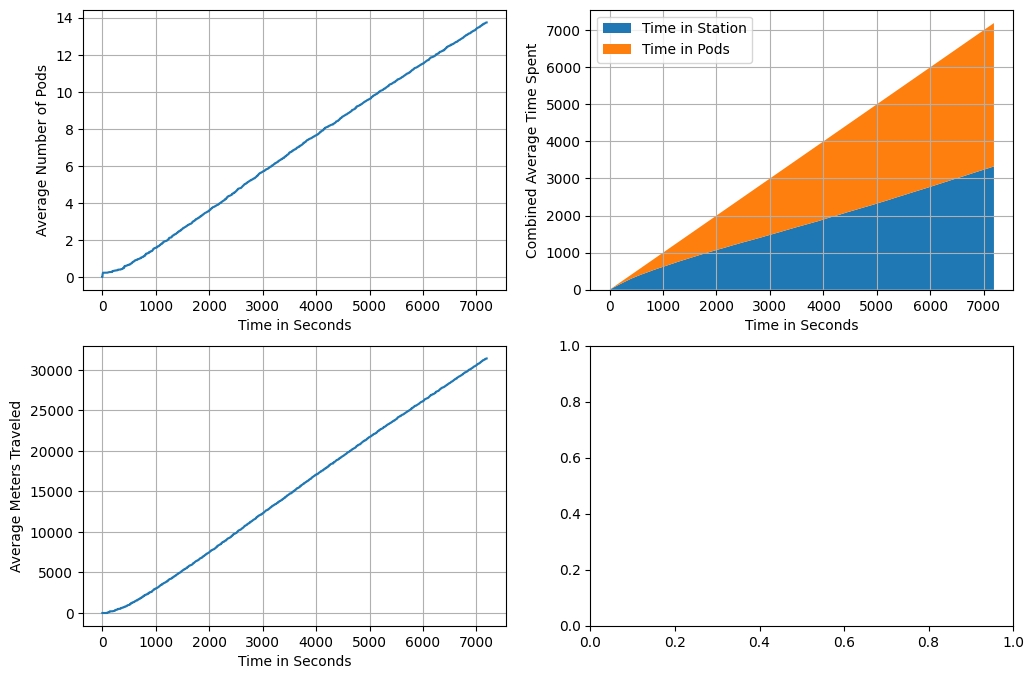

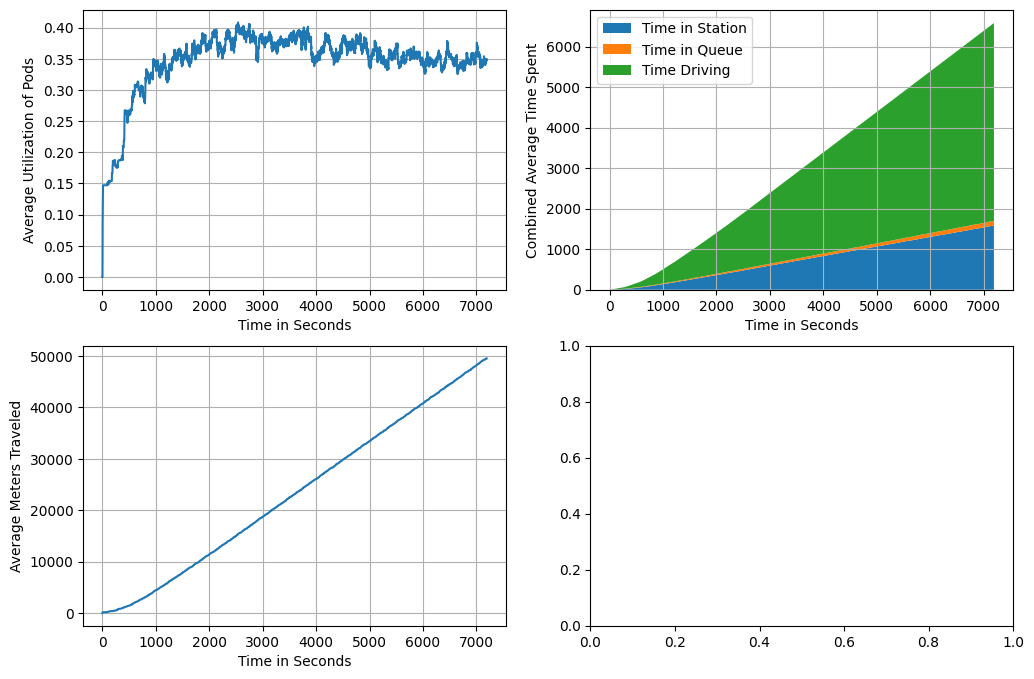

In [44]:
people_avg_metrics = pd.read_csv("/home/david/Code/Uni/publicflow/metrics/dev/2022.09.23_13:09/people/avg.txt")
pods_avg_metrics = pd.read_csv("/home/david/Code/Uni/publicflow/metrics/dev/2022.09.23_13:09/pods/avg.txt")
plot_people_metrics(people_avg_metrics, 0,7200)
plot_pods_metrics(pods_avg_metrics, 0,7200)

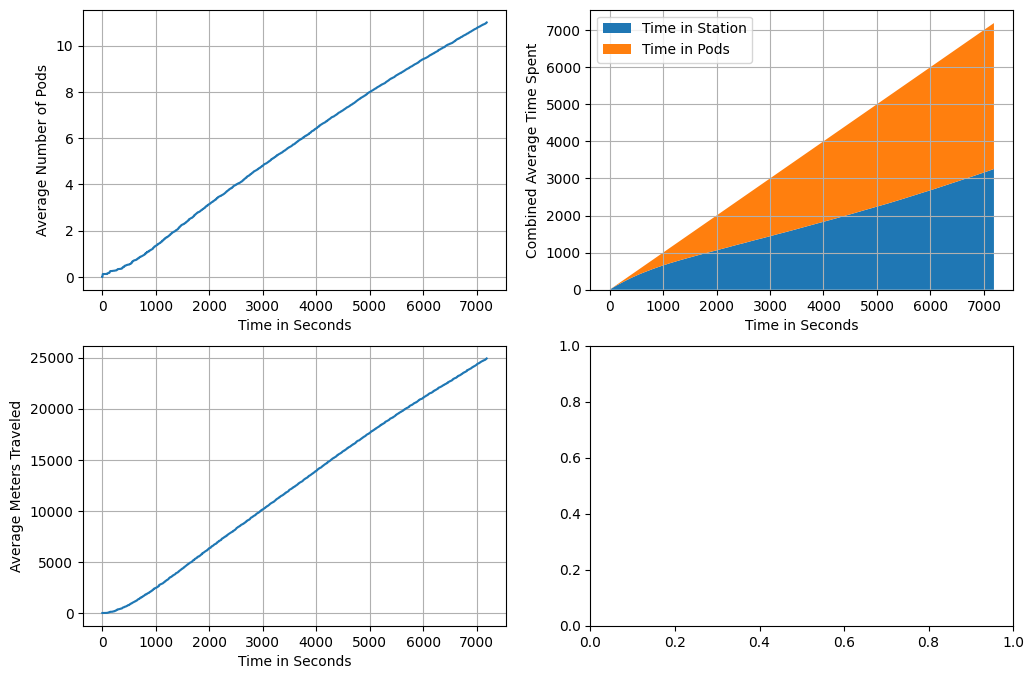

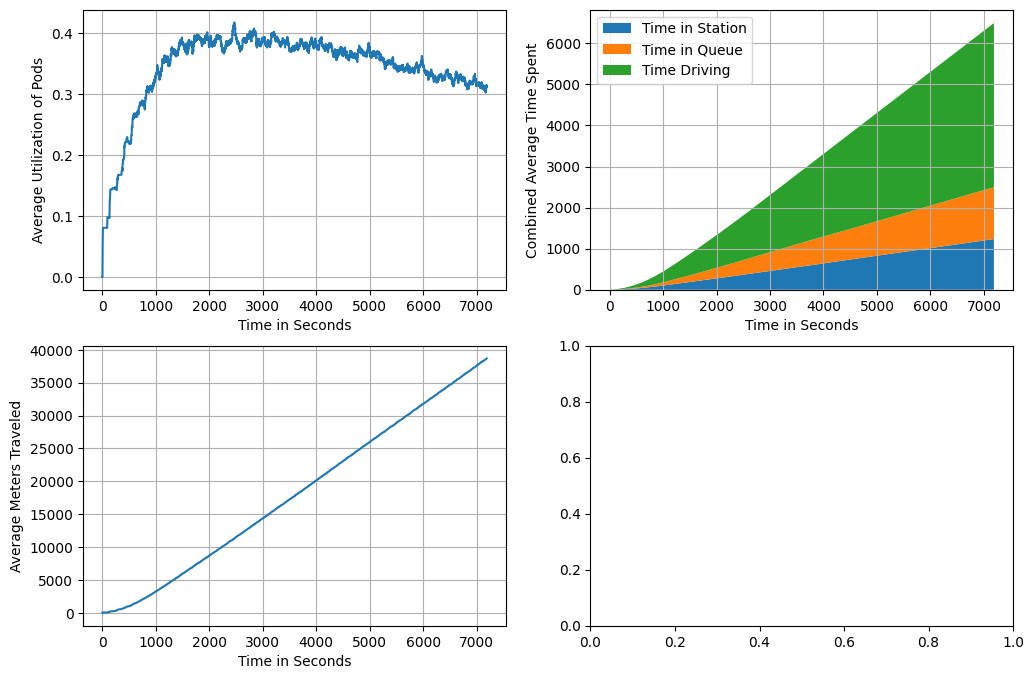

In [45]:
people_avg_metrics = pd.read_csv("/home/david/Code/Uni/publicflow/metrics/dev/2022.09.23_13:12/people/avg.txt")
pods_avg_metrics = pd.read_csv("/home/david/Code/Uni/publicflow/metrics/dev/2022.09.23_13:12/pods/avg.txt")
plot_people_metrics(people_avg_metrics, 0,7200)
plot_pods_metrics(pods_avg_metrics, 0,7200)

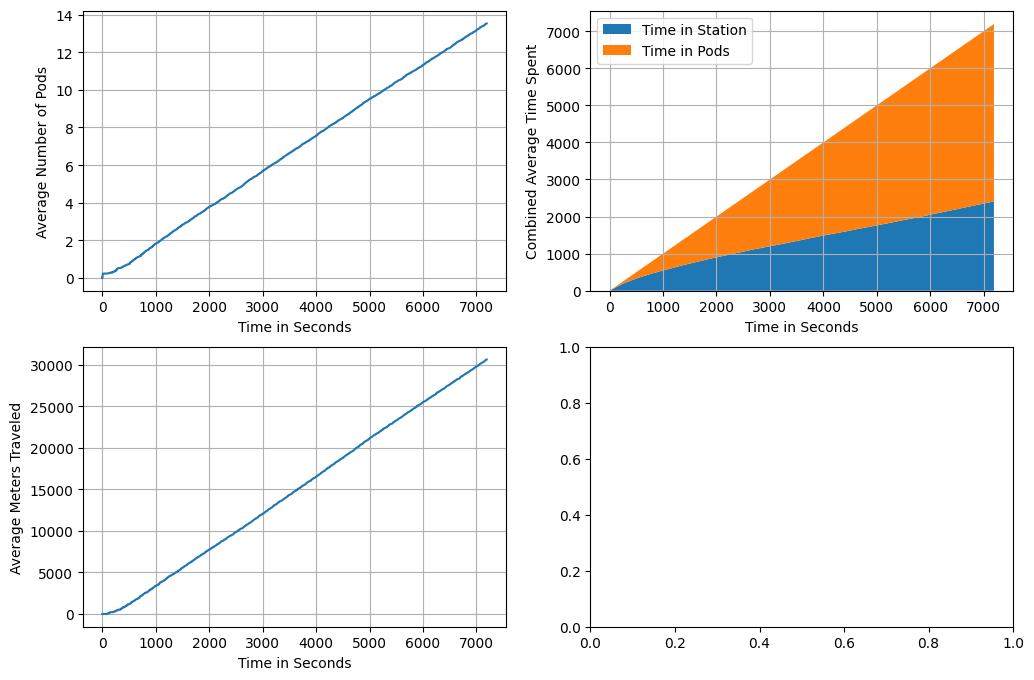

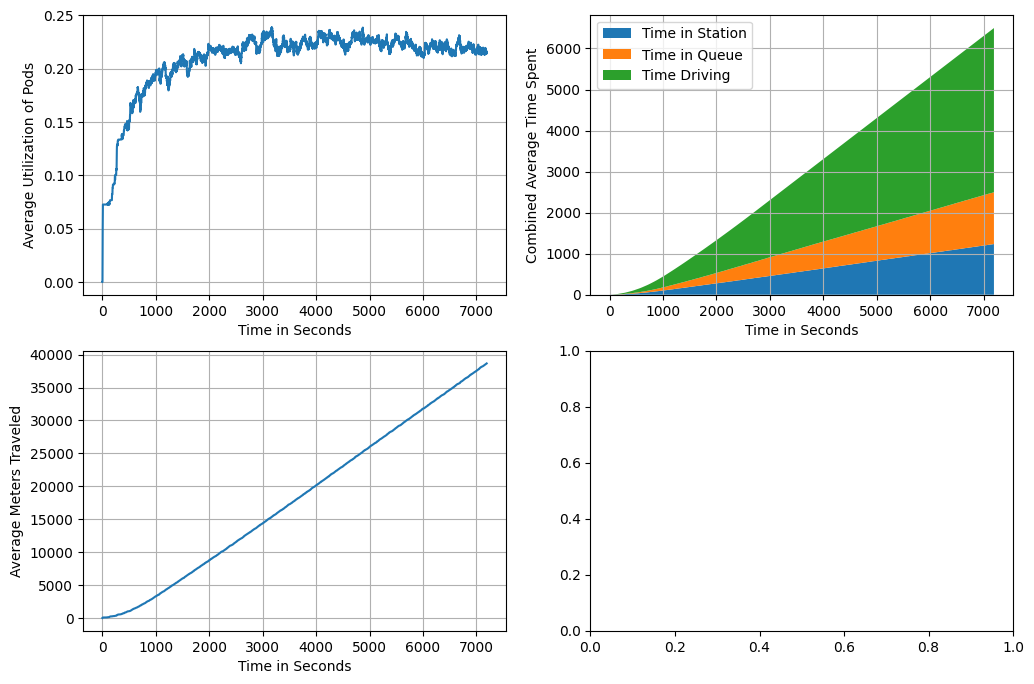

In [46]:
people_avg_metrics = pd.read_csv("/home/david/Code/Uni/publicflow/metrics/dev/2022.09.23_13:14/people/avg.txt")
pods_avg_metrics = pd.read_csv("/home/david/Code/Uni/publicflow/metrics/dev/2022.09.23_13:14/pods/avg.txt")
plot_people_metrics(people_avg_metrics, 0,7200)
plot_pods_metrics(pods_avg_metrics, 0,7200)

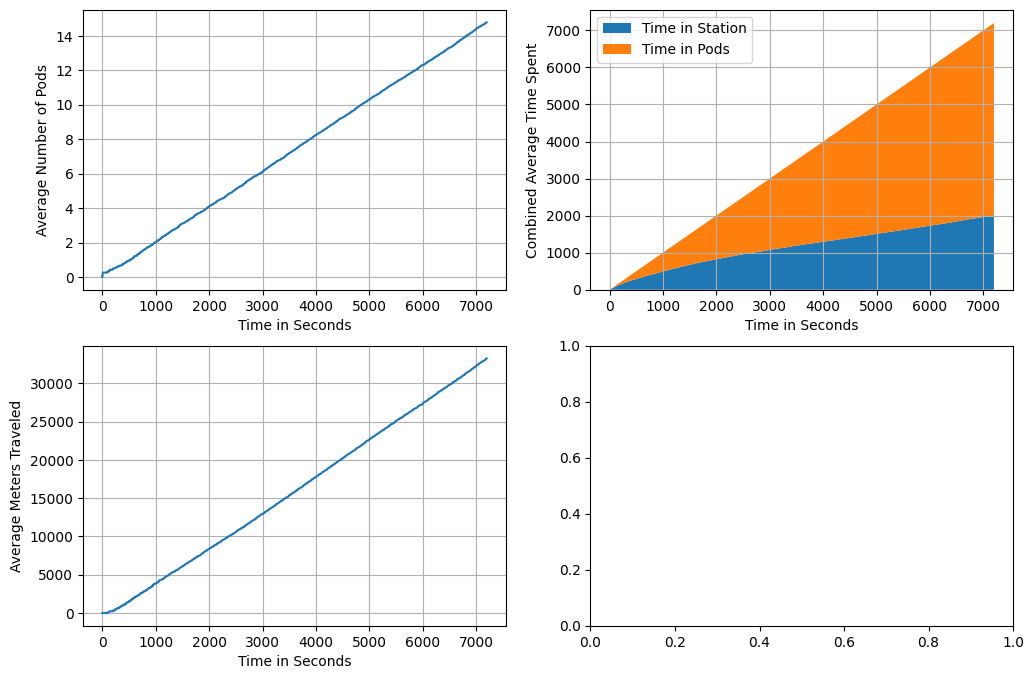

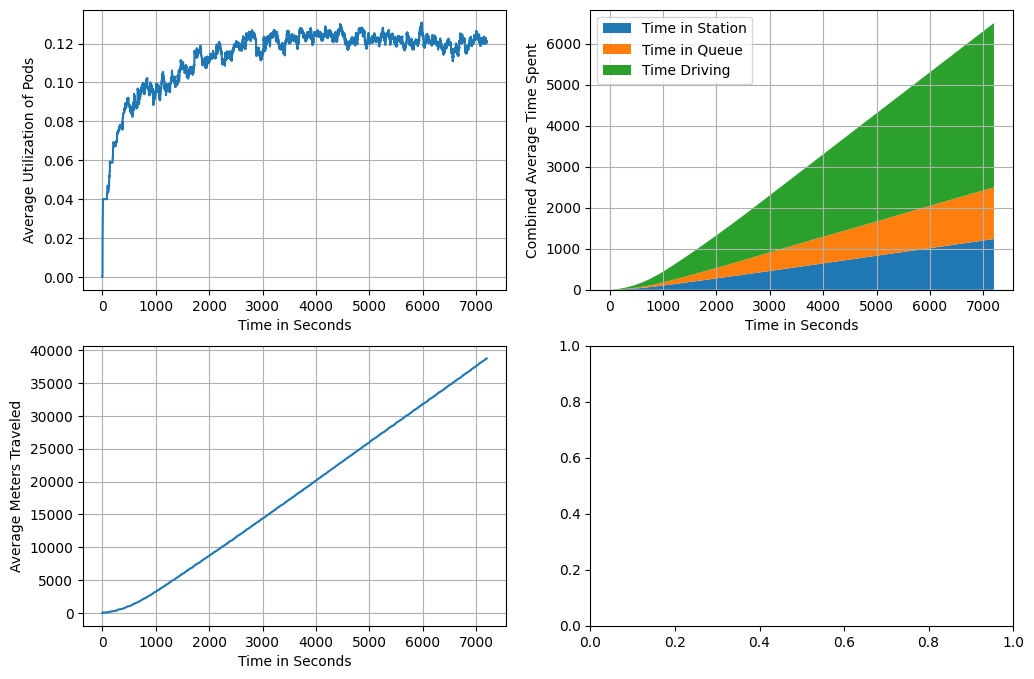

In [47]:
people_avg_metrics = pd.read_csv("/home/david/Code/Uni/publicflow/metrics/dev/2022.09.23_13:17/people/avg.txt")
pods_avg_metrics = pd.read_csv("/home/david/Code/Uni/publicflow/metrics/dev/2022.09.23_13:17/pods/avg.txt")
plot_people_metrics(people_avg_metrics, 0,7200)
plot_pods_metrics(pods_avg_metrics, 0,7200)

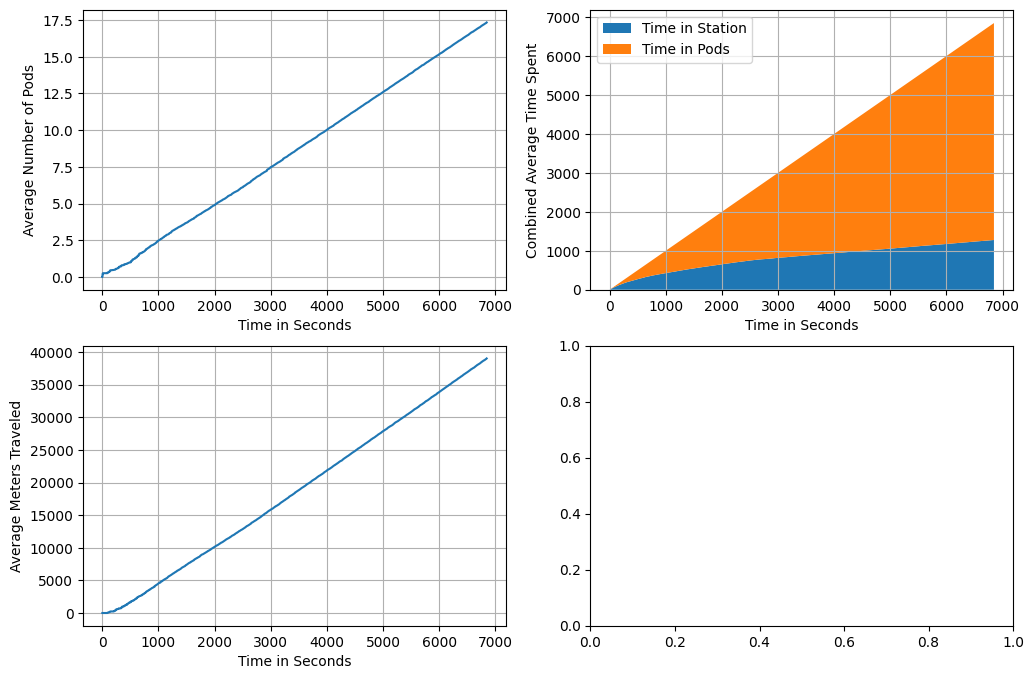

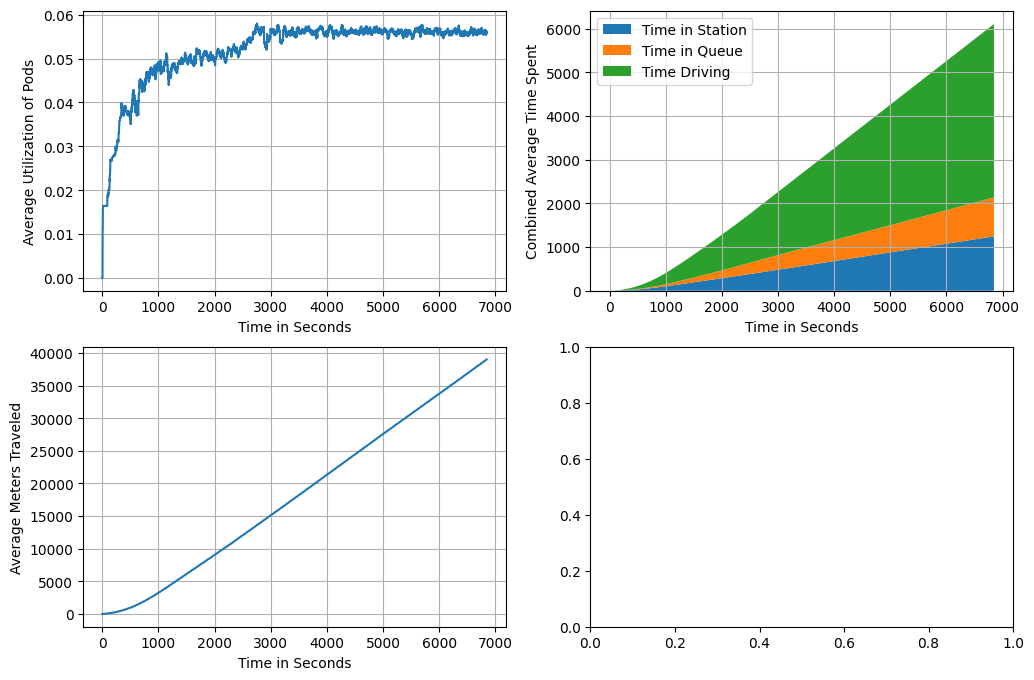

In [48]:
people_avg_metrics = pd.read_csv("/home/david/Code/Uni/publicflow/metrics/dev/2022.09.23_13:27/people/avg.txt")
pods_avg_metrics = pd.read_csv("/home/david/Code/Uni/publicflow/metrics/dev/2022.09.23_13:27/pods/avg.txt")
plot_people_metrics(people_avg_metrics, 0,7200)
plot_pods_metrics(pods_avg_metrics, 0,7200)

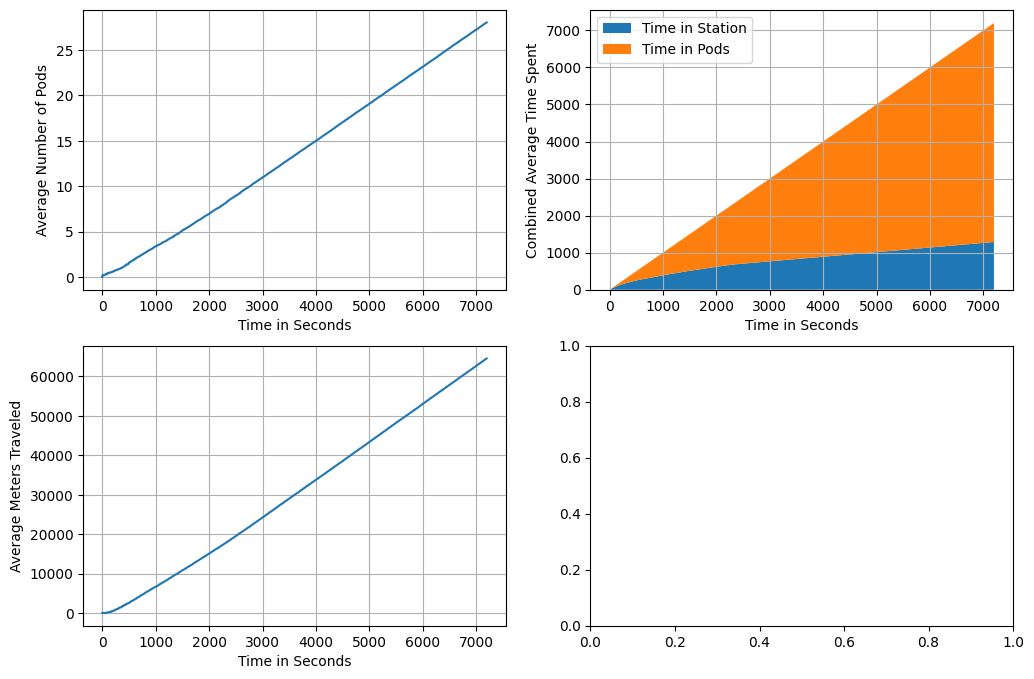

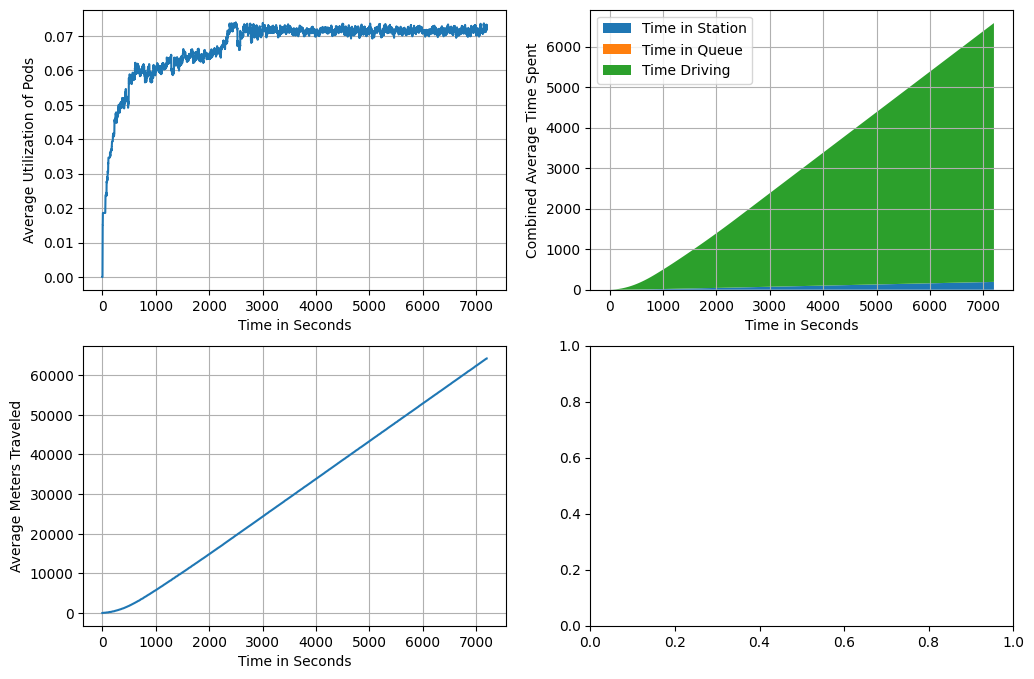

In [49]:
people_avg_metrics = pd.read_csv("/home/david/Code/Uni/publicflow/metrics/dev/2022.09.23_13:34/people/avg.txt")
pods_avg_metrics = pd.read_csv("/home/david/Code/Uni/publicflow/metrics/dev/2022.09.23_13:34/pods/avg.txt")
plot_people_metrics(people_avg_metrics, 0,7200)
plot_pods_metrics(pods_avg_metrics, 0,7200)